### Logistic Regression Project Tutorial

**Bank Marketing Campaign:**

*Business Understanding:*

Term deposits allow banks to hold money for an specific amount of time, which allows the bank to use that money for better investments. The marketing campaigns for this product were based on phone calls. Often, more than one contact to the same client was required, in order to know if the term deposit would be or not subscribed.

*Problem Description:*

Portuguese bank is having a decrease in its revenue so they want to be able to identify existing clients that have a higher chance to subscribe a term deposit. This will allow the bank to focus marketing efforts on those clients and avoid wasting money and time on clients that will probably not subscribe, as they want to increase their revenue.

To approach this problem we will create a classification algorithm that helps predict if a client will subscribe or not a term deposit.

**Importar librerías y cargar dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, delimiter=';')

**Ver las variables y una muestra de su contenido**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17667,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32012,30,technician,single,university.degree,unknown,yes,no,cellular,may,thu,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
21190,35,admin.,single,university.degree,no,yes,yes,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
35665,24,student,single,high.school,no,yes,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
26650,30,unemployed,married,university.degree,no,no,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
15931,33,blue-collar,married,unknown,no,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
33682,25,blue-collar,single,basic.6y,unknown,no,no,cellular,may,wed,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
26777,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
10573,38,admin.,married,university.degree,no,yes,no,telephone,jun,tue,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Meaning of each attribute:**

*Age* (numerical)

*Job*: Type of Job (categorical)

*Marital*: marital status (categorical)

*Education*: (categorical)

*Default*: has credit in default? (categorical)

*Housing*: has housing loan? (categorical)

*Loan*: has personal loan? (categorical)

*contact*: contact communication type (categorcial)

*month*: last contact month of year (categorical)

*day_of_week*: last contact day of the week (categorical)

*duration*: last contact duration, in seconds (numerical)
Important note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.

*campaign*: number of contacts performed during this campaign and for this client (numerical)

*pdays*: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*previous*: number of contacts performed before this campaign and for this client (numerical)

*poutcome*: outcome of the previous marketing campaign (categorical)
Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.

*emp.var.rate*: employment variation rate - quarterly indicator (numeric)

*cons.price.idx*: consumer price index- monthly indicator (numeric)

*cons.conf.idx*: consumer confidence index - monthly indicator (numeric)

*euribor3m*: euribor 3 month rate: - daily indicator(numeric)

*nr.employed*: number of employees - quarterly indicator (numeric)


**Target variable:**

*y*: has the client subscribed a term deposit?

**EDA sobre dataset de entrenamiento**

In [3]:
X_eda = df.drop(columns=['y'])
y_eda = df['y']

X_train_eda, X_test_eda, y_train_eda, y_test_eda = train_test_split(X_eda, y_eda, test_size=0.3, random_state=9)

df_train_eda = pd.concat([X_train_eda, y_train_eda], axis=1)

**Bar plot de la variable target**

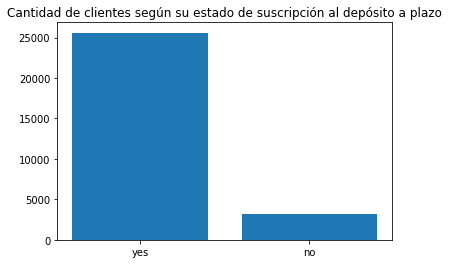

In [4]:
x = df_train_eda['y'].unique().tolist()
n_no = len(df_train_eda[df_train_eda['y']=='no'])
n_si = len(df_train_eda[df_train_eda['y']=='yes'])
height = [n_no, n_si]

plt.bar(x, height)
plt.title('Cantidad de clientes según su estado de suscripción al depósito a plazo')
plt.show()

La mayoría de los casos corresponden a clientes cuya respuesta fue negativa. Se trata de un conjunto de datos no balanceado.

In [5]:
print(f'El dataset no es balanceado, solo el {round((n_si*100)/(n_no+n_si))}% de los clientes se han suscrito a un depósito a plazo.')

El dataset no es balanceado, solo el 11% de los clientes se han suscrito a un depósito a plazo.


**Histogramas**

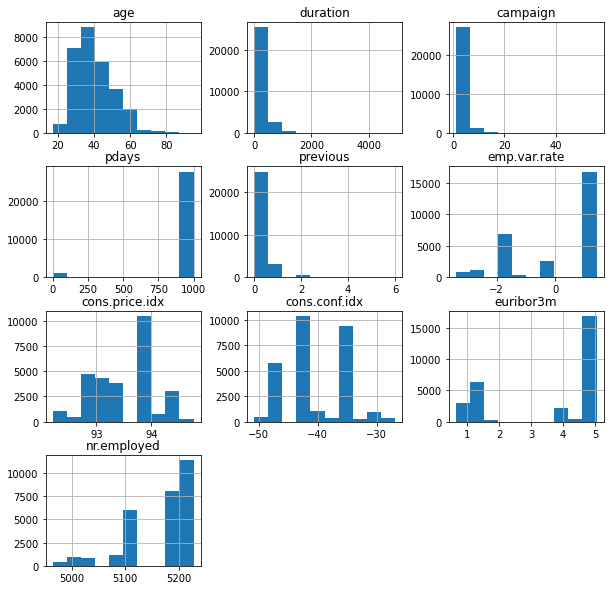

In [6]:
num_columns_list = list(df.select_dtypes(include=['int64', 'float64']).columns)

df_train_eda[num_columns_list].hist(figsize=(10,10))
plt.show()

**Boxplots**

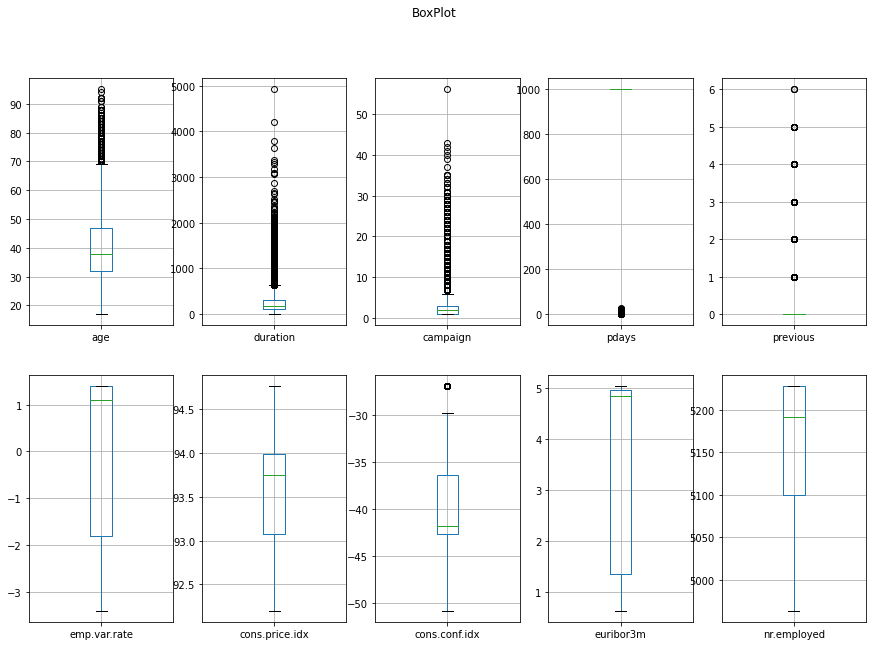

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
axs = ax.flatten()
for i in range(10):
    df_train_eda[num_columns_list].iloc[:, i].to_frame().boxplot(ax=axs[i])
plt.suptitle("BoxPlot")
plt.show()

**Eliminar duplicados**

In [11]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Reemplazar valores desconocidos**

Variables categóricas:

In [7]:
def sust_unk_cat(columna):

    moda = df[columna].mode().tolist()[0]

    def unknown_categorico(valor):
        if valor == 'unknown':
            return moda
        else:
            return valor

    df[columna] = df[columna].apply(unknown_categorico)

In [8]:
variables_categoricas = df.columns[df.dtypes == 'object'].tolist()
del variables_categoricas[-1]

for variable in variables_categoricas:
    sust_unk_cat(variable)

**Outliers**

In [9]:
def limites_outliers(columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    IQR = q3 - q1
    min_so = q1 - 1.5*IQR
    max_so = q3 + 1.5*IQR
    return [min_so, max_so]

In [10]:
lim_age = limites_outliers('age')
lim_duration = limites_outliers('duration')
lim_campaign = limites_outliers('campaign')

In [11]:
df = df.drop(df[(df['age'] < lim_age[0]) | (df['age'] > lim_age[1])].index)
df = df.drop(df[(df['duration'] < lim_duration[0]) | (df['duration'] > lim_duration[1])].index)
df = df.drop(df[(df['campaign'] < lim_campaign[0]) | (df['campaign'] > lim_campaign[1])].index)

**Convertir edad a categórico**

In [12]:
age_groups = pd.cut(df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['1', '2', '3', '4', '5', '6', '7', '8', '9'])
df['age_groups'] = age_groups.astype(str).astype(int)

df.drop('age', axis=1, inplace=True)

**Convertir las categorías 'basic.9y','basic.6y','basic.4y' a 'middle.school'**

In [13]:
def sustituir_categoria(valor):
    if valor in ['basic.9y','basic.6y','basic.4y']:
        return 'middle.school'
    else:
        return valor

In [14]:
df['education'] = df['education'].apply(sustituir_categoria)

**Convertir la variable target a binario**

In [15]:
y_dict = {'yes':1, 'no':0}
df['y'] = df['y'].map(y_dict)

**Codificar variables categóricas**

In [16]:
df['month'].value_counts()

may    12159
jul     5881
aug     5317
jun     4507
nov     3707
apr     2306
oct      594
mar      467
sep      459
dec      138
Name: month, dtype: int64

In [17]:
month_dict = {'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(month_dict)

In [18]:
df['day_of_week'].value_counts()

mon    7494
thu    7313
tue    7052
wed    6998
fri    6678
Name: day_of_week, dtype: int64

In [19]:
day_dict = {'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6}
df['day_of_week'] = df['day_of_week'].map(day_dict)

In [20]:
object_columns_list = list(df.select_dtypes(include='object').columns)
df = pd.get_dummies(df, columns = object_columns_list)

**Construcción y evaluación del modelo**

In [21]:
X = df.drop(columns=['y'])
y = df['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = modelo_lr.predict(X_test)

In [26]:
acc = accuracy_score(y_test, y_pred)
acc

0.9326517212269018

In [27]:
f1 = f1_score(y_test, y_pred)
f1

0.4878744650499287

In [28]:
recall = recall_score(y_test, y_pred)
recall

0.39085714285714285

In [29]:
confusion_matrix(y_test, y_pred)

array([[9601,  185],
       [ 533,  342]])

**Modelo modificando hiperparámetros**

In [30]:
# define models and parameters

model = LogisticRegression(max_iter=100000)
solvers = ['lbfgs', 'liblinear']    # No se incluyó newton-cg porque en ese caso no converge
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936292 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.935689 (0.003717) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935689 (0.003717) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.935716 (0.003743) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935716 (0.003743) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.935662 (0.003759) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935703 (0.003807) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.935930 (0.003949) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936038 (0.003998) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.935944 (0.003967) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936292 (0.004010) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [31]:
modelo_hp = LogisticRegression(C=0.1, penalty='l2', solver= 'liblinear')
modelo_hp.fit(X_train, y_train)
y_pred_hp = modelo_hp.predict(X_test)

In [32]:
acc_hp = accuracy_score(y_test, y_pred_hp)
acc_hp

0.933308320045024

In [33]:
f1_hp = f1_score(y_test, y_pred_hp)
f1_hp

0.4873828406633021

In [34]:
recall_hp = recall_score(y_test, y_pred_hp)
recall_hp

0.3862857142857143

In [35]:
confusion_matrix(y_test, y_pred_hp)

array([[9612,  174],
       [ 537,  338]])

In [36]:
print(f'El valor de accuracy del modelo con hiperparámetros por defecto es {acc :.4f}.')
print(f'El valor de accuracy del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es {acc_hp :.4f}.')

El valor de accuracy del modelo con hiperparámetros por defecto es 0.9327.
El valor de accuracy del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es 0.9333.


In [37]:
print(f'El valor de F1 del modelo con hiperparámetros por defecto es {f1 :.4f}.')
print(f'El valor de F1 del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es {f1_hp :.4f}.')

El valor de F1 del modelo con hiperparámetros por defecto es 0.4879.
El valor de F1 del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es 0.4874.


In [38]:
print(f'El valor de recall del modelo con hiperparámetros por defecto es {recall :.4f}.')
print(f'El valor de recall del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es {recall_hp :.4f}.')

El valor de recall del modelo con hiperparámetros por defecto es 0.3909.
El valor de recall del modelo con hiperparámetros C= 0.1, penalty=l2, solver=liblinear es 0.3863.


Utilizar los hiperparámetros mencionados no generó un cambio considerable en los valores de accuracy, f1 y recall.
Por este motivo en el archivo app.py voy a generar el modelo con parámetros por defecto.